In [1]:
from skimage import io, morphology
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage import exposure
import ipywidgets as widgets
from math import sqrt
import numpy as np
import cv2
from math import copysign, log10
from imblearn.under_sampling import RandomUnderSampler
import warnings
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
clf = RandomForestClassifier(n_estimators=10)

def add_zero(x):
    if x < 10:
        return "0" + str(x)
    return str(x)

def measure(name, value_):
    display(widgets.BoundedFloatText(description=name, value=value_, max=value_ + 1, disabled=True))

def get_images(number):
    photo = io.imread("healthy/" + number + "_h.jpg")
    manual = io.imread("healthy_manualsegm/" + number + "_h.tif")
    fov = rgb2gray(io.imread("healthy_fovmask/" + number + "_h_mask.tif"))
    
    photo[:,:,0] = 0
    photo[:,:,2] = 0
    photo = rgb2gray(photo)
    photo = exposure.equalize_adapthist(photo)
    return photo, manual, fov

def analyze_photos(green_image, manual):
    divided, mask = [], []
    size_x, size_y = len(green_image[0]) // 5, len(green_image) // 5
    for y in range(size_y):
        for x in range(size_x):
            divided.append([])
            mask.append(manual[y * 5 + 2][x * 5 + 2])
            for j in range(5):
                for k in range(5):
                    divided[-1].append(green_image[y * 5 + j][x * 5 + k])
            metrics = [np.var(divided[-1])]
            # Calculate Moments
            moments = cv2.moments(np.float32(divided[-1]))
            # Calculate Hu Moments
            huMoments = cv2.HuMoments(moments).reshape((7,))
            # Log scale hu moments
            for j in range(0,7):
                if huMoments[j] != 0:
                    huMoments[j] = -1* copysign(1.0, huMoments[j]) * log10(abs(huMoments[j]))
            metrics.extend(huMoments)
            divided[-1] = metrics
    return divided, mask

In [4]:
for i in range(1, 11):
    green_image, manual, fov = get_images(add_zero(i))

    rus = RandomUnderSampler(random_state=42)
    divided, mask = analyze_photos(green_image, manual)
    x_res, y_res = rus.fit_resample(divided, mask)
    
    clf = clf.fit(x_res, y_res)

dump(clf, 'rfc.joblib')

['rfc.joblib']

BoundedFloatText(value=665402.0, description='true pos', disabled=True, max=665403.0)

BoundedFloatText(value=1970277.0, description='false pos', disabled=True, max=1970278.0)

BoundedFloatText(value=4176310.0, description='true neg', disabled=True, max=4176311.0)

BoundedFloatText(value=99776.0, description='false neg', disabled=True, max=99777.0)

BoundedFloatText(value=0.7005029829573198, description='accuracy', disabled=True, max=1.7005029829573197)

BoundedFloatText(value=0.8696041966705786, description='sensivity', disabled=True, max=1.8696041966705788)

BoundedFloatText(value=0.6794518649129997, description='specificity', disabled=True, max=1.6794518649129997)

BoundedFloatText(value=0.2524594231695134, description='precision', disabled=True, max=1.2524594231695134)

BoundedFloatText(value=0.7686704060675131, description='g-mean', disabled=True, max=1.7686704060675131)

BoundedFloatText(value=0.3913143069526299, description='f-measure', disabled=True, max=1.39131430695263)

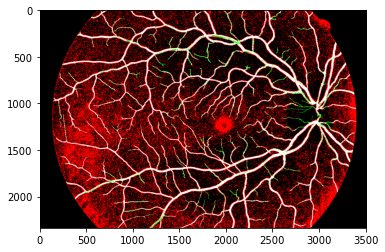

BoundedFloatText(value=735123.0, description='true pos', disabled=True, max=735124.0)

BoundedFloatText(value=1469718.0, description='false pos', disabled=True, max=1469719.0)

BoundedFloatText(value=4581715.0, description='true neg', disabled=True, max=4581716.0)

BoundedFloatText(value=123878.0, description='false neg', disabled=True, max=123879.0)

BoundedFloatText(value=0.7693927761990057, description='accuracy', disabled=True, max=1.7693927761990058)

BoundedFloatText(value=0.855788293610834, description='sensivity', disabled=True, max=1.8557882936108339)

BoundedFloatText(value=0.7571289312795829, description='specificity', disabled=True, max=1.757128931279583)

BoundedFloatText(value=0.33341315768347923, description='precision', disabled=True, max=1.3334131576834793)

BoundedFloatText(value=0.8049484928510325, description='g-mean', disabled=True, max=1.8049484928510324)

BoundedFloatText(value=0.479870045518013, description='f-measure', disabled=True, max=1.479870045518013)

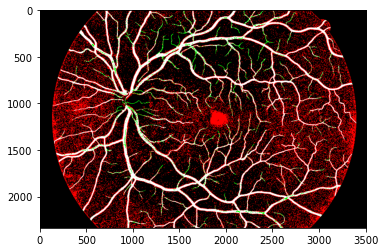

BoundedFloatText(value=612185.0, description='true pos', disabled=True, max=612186.0)

BoundedFloatText(value=2054960.0, description='false pos', disabled=True, max=2054961.0)

BoundedFloatText(value=4142852.0, description='true neg', disabled=True, max=4142853.0)

BoundedFloatText(value=100210.0, description='false neg', disabled=True, max=100211.0)

BoundedFloatText(value=0.6881178812733106, description='accuracy', disabled=True, max=1.6881178812733106)

BoundedFloatText(value=0.8593336561879295, description='sensivity', disabled=True, max=1.8593336561879295)

BoundedFloatText(value=0.6684378293500997, description='specificity', disabled=True, max=1.6684378293500997)

BoundedFloatText(value=0.22952820337851898, description='precision', disabled=True, max=1.229528203378519)

BoundedFloatText(value=0.7578991514903183, description='g-mean', disabled=True, max=1.7578991514903182)

BoundedFloatText(value=0.362288950567237, description='f-measure', disabled=True, max=1.3622889505672369)

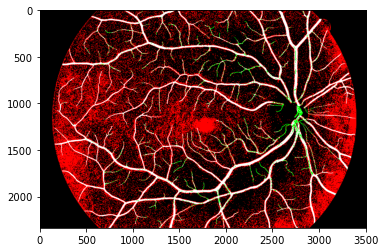

BoundedFloatText(value=585848.0, description='true pos', disabled=True, max=585849.0)

BoundedFloatText(value=1947779.0, description='false pos', disabled=True, max=1947780.0)

BoundedFloatText(value=4246381.0, description='true neg', disabled=True, max=4246382.0)

BoundedFloatText(value=128042.0, description='false neg', disabled=True, max=128043.0)

BoundedFloatText(value=0.699506952034221, description='accuracy', disabled=True, max=1.699506952034221)

BoundedFloatText(value=0.8206418355769096, description='sensivity', disabled=True, max=1.8206418355769096)

BoundedFloatText(value=0.6855459013005799, description='specificity', disabled=True, max=1.6855459013005798)

BoundedFloatText(value=0.23122898516632479, description='precision', disabled=True, max=1.2312289851663247)

BoundedFloatText(value=0.7500584289343963, description='g-mean', disabled=True, max=1.7500584289343963)

BoundedFloatText(value=0.36079749544036255, description='f-measure', disabled=True, max=1.3607974954403625)

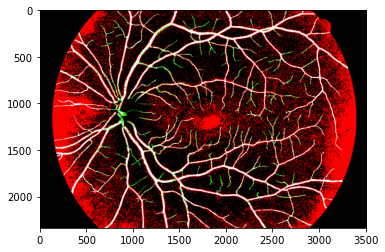

BoundedFloatText(value=433557.0, description='true pos', disabled=True, max=433558.0)

BoundedFloatText(value=979821.0, description='false pos', disabled=True, max=979822.0)

BoundedFloatText(value=5289531.0, description='true neg', disabled=True, max=5289532.0)

BoundedFloatText(value=207632.0, description='false neg', disabled=True, max=207633.0)

BoundedFloatText(value=0.8281678670309603, description='accuracy', disabled=True, max=1.8281678670309605)

BoundedFloatText(value=0.6761766031544522, description='sensivity', disabled=True, max=1.676176603154452)

BoundedFloatText(value=0.8437125559387956, description='specificity', disabled=True, max=1.8437125559387955)

BoundedFloatText(value=0.30675233377058364, description='precision', disabled=True, max=1.3067523337705835)

BoundedFloatText(value=0.7553136369174434, description='g-mean', disabled=True, max=1.7553136369174434)

BoundedFloatText(value=0.42204221132725284, description='f-measure', disabled=True, max=1.4220422113272528)

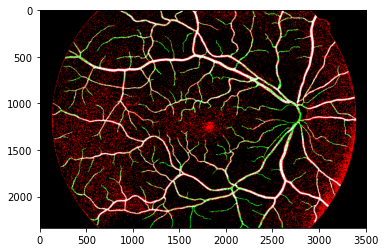

In [5]:
clf = load('rfc.joblib') 

for i in range(11, 16):
    green_image, manual, fov = get_images(add_zero(i))
    divided, mask = analyze_photos(green_image, manual)
    result = clf.predict(divided)
    
    end_photo = [[[0, 0, 0] for _ in range(len(green_image[0]))] for _ in range(len(green_image))]
    size_x, size_y = len(green_image[0]) // 5, len(green_image) // 5
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    row, col = 0, 0
    for x in range(len(result)):
        if col >= size_x * 5:
            row += 5
            col = 0
        for j in range(5):
            for k in range(5):
                if fov[row + j][col + k] != 0:
                    if result[x] == 0 and manual[row + j][col + k] == 0:
                        true_neg += 1
                    if result[x] == 0 and manual[row + j][col + k] != 0:
                        false_neg += 1
                        end_photo[row + j][col + k] = [0, 255, 0]
                    if result[x] != 0 and manual[row + j][col + k] == 0:
                        false_pos += 1
                        end_photo[row + j][col + k] = [255, 0, 0]
                    if result[x] != 0 and manual[row + j][col + k] != 0:
                        true_pos += 1
                        end_photo[row + j][col + k] = [255, 255, 255]
                    #end_photo[row + j][col + k] = result[x]
        col += 5        
                    
    measure("true pos", true_pos)
    measure("false pos", false_pos)
    measure("true neg", true_neg)
    measure("false neg", false_neg)
                    
    sensivity = true_pos / (true_pos + false_neg)
    specificity = true_neg / (false_pos + true_neg)
    precision = true_pos / (true_pos + false_pos)
    measure("accuracy", (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg))
    measure("sensivity", sensivity)
    measure("specificity", specificity)
    measure("precision", precision)
    measure("g-mean", sqrt(sensivity * specificity))
    measure("f-measure", (2 * precision * sensivity) / (precision + sensivity))

    plt.imshow(end_photo)
    plt.show()